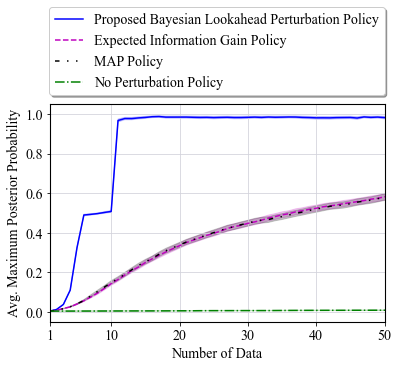

In [15]:
import gym
import pygame
import pickle
import matplotlib.pyplot as plt
import numpy as np
from enum import IntEnum
import dill
from statistics import variance, mean, stdev

from matplotlib import pyplot as plt

import dill

import random

from itertools import product

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable


from sklearn.preprocessing import MinMaxScaler

from collections import defaultdict


with open('Random.pkl','rb') as f:  # Python 3: open(..., 'wb')
    max_pis_ours1, max_pis_random, max_pis_NoPerturb = pickle.load(f)

with open('Our_Main.pkl','rb') as f:  # Python 3: open(..., 'wb')
    max_pis_ours, max_pis_random1, max_pis_NoPerturb1 = pickle.load(f)

with open('MAP_Final_1.pkl','rb') as f:  # Python 3: open(..., 'wb')
    max_pis_MAP = pickle.load(f)

with open('AL_Final_1.pkl','rb') as f:  # Python 3: open(..., 'wb')
    max_pis_AL = pickle.load(f)

horizon = 100

our_mean = np.zeros(horizon)
our_std = np.zeros(horizon)
total_episodes = np.arange(horizon)


for i in range(horizon):

    our_mean[i] = np.mean(max_pis_ours[:,i])
    our_std[i] = np.std(max_pis_ours[:,i])/(np.sqrt(1000))

random_mean = np.zeros(horizon)
radom_std = np.zeros(horizon)

for i in range(horizon):

    random_mean[i] = np.mean(max_pis_random[:,i])
    radom_std[i] = np.std(max_pis_random[:,i])/(np.sqrt(1000))

NoPerturb_mean = np.zeros(horizon)
NoPerturb_std = np.zeros(horizon)

for i in range(horizon):

    NoPerturb_mean[i] = np.mean(max_pis_NoPerturb[:,i])
    NoPerturb_std[i] = np.std(max_pis_NoPerturb[:,i])/(np.sqrt(1000))

MAP_mean = np.zeros(horizon)
MAP_std = np.zeros(horizon)

for i in range(horizon):

    MAP_mean[i] = np.mean(max_pis_MAP[:,i])
    MAP_std[i] = np.std(max_pis_MAP[:,i])/(np.sqrt(1000))

AL_mean = np.zeros(horizon)
AL_std = np.zeros(horizon)

for i in range(horizon):

    AL_mean[i] = np.mean(max_pis_AL[:,i])
    AL_std[i] = np.std(max_pis_AL[:,i])/(np.sqrt(1000))


font = {'size'   : 14}
plt.rc('font', **font)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = '#d3d3db'
plt.rcParams['axes.linewidth'] = 1.1

total_episodes = total_episodes + 1

plt.fill_between(total_episodes, our_mean - 1.96*our_std, our_mean + 1.96*our_std, alpha=0.2, color='b')
plt.plot(total_episodes, our_mean, color='b', label='Proposed Bayesian Lookahead Perturbation Policy')

plt.fill_between(total_episodes, AL_mean - 1.96*AL_std, AL_mean + 1.96*AL_std, alpha=0.2, color='m')
plt.plot(total_episodes, AL_mean, color='m', label='Expected Information Gain Policy', linestyle='--')

plt.fill_between(total_episodes, MAP_mean - 1.96*MAP_std, MAP_mean + 1.96*MAP_std, alpha=0.2, color='k')
plt.plot(total_episodes, MAP_mean, color='k', label='MAP Policy', linestyle = (0, (3, 5, 1, 5, 1, 5)))

plt.fill_between(total_episodes, NoPerturb_mean - 1.96*NoPerturb_std, NoPerturb_mean + 1.96*NoPerturb_std, alpha=0.2, color='g')
plt.plot(total_episodes, NoPerturb_mean, color='g', label='No Perturbation Policy', linestyle='-.')

######################

plt.xlabel('Number of Data')
plt.ylabel('Avg. Maximum Posterior Probability')

plt.legend(loc='upper center', bbox_to_anchor=(0.50, +1.48), fancybox=True, shadow=True)

plt.xlim([1,49+1])
plt.xticks([1,10,20,30,40,50])
plt.ylim([-0.05,1.05])

plt.savefig("BaseCaseSevenActions_AddedAL&MAP_FinalV1.png", dpi=300, bbox_inches = "tight")

plt.show()
